## Exercise 1 - Scottish lakes

In [1]:
# Downloading the table directly from the source
lakes_url <- "https://en.wikipedia.org/wiki/List_of_lochs_of_Scotland"
library(httr)
library(XML)
r <- GET(lakes_url)
doc <- readHTMLTable(doc = content(r,"text"))

# The table is the very first element in the doc list
scottish.lakes <- as.data.frame(doc[[1]],stringsAsFactors = FALSE)

scottish.lakes
# This procedure retrieved the table names as a row. Extracting, removing and renaming.
headers <- t(scottish.lakes[1,])
scottish.lakes <- scottish.lakes[-1,]
names(scottish.lakes) <- headers

# There are some reference brackets.
clean <- function(x){
    tmp <- as.character(x)
    last <- gregexpr("[^0-9A-Za-z().///' ]", tmp)[[1]][1]
    ntmp <- substring(tmp,1,last-1)
    return(ntmp)
}

gooddata <- lapply(scottish.lakes[,6], clean)
goodname <- clean(colnames(scottish.lakes)[6])
colnames(scottish.lakes)[6] <- goodname
scottish.lakes[goodname] <- as.double(gooddata)

# Casting numeric values as such
for (i in 2:5){
    data <- scottish.lakes[i]
    scottish.lakes[i] <- as.double(t(data))
}


scottish.lakes

V1,V2,V3,V4,V5,V6
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
Loch,Volume(km³),Area(km²),Length(km),Max. depth(m),Mean depth(m)[6]
Loch Ness,7.45,56,39,230,132[4]
Loch Lomond,2.6,71,36,190,37[7]
Loch Morar,2.3,27,18.8,310,87[8]
Loch Tay,1.6,26.4,23,150,60.6[9]
Loch Awe,1.2,39,41,94,32[10]
Loch Maree,1.09,28.6,20,114,38[5]
Loch Ericht,1.08,18.6,23,156,57.6[9]
Loch Lochy,1.07,16,16,162,70[11]


,Loch,Volume(km³),Area(km²),Length(km),Max. depth(m),Mean depth(m)
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Ness,7.45,56.0,39.0,230,132.0
3,Loch Lomond,2.60,71.0,36.0,190,37.0
4,Loch Morar,2.30,27.0,18.8,310,87.0
5,Loch Tay,1.60,26.4,23.0,150,60.6
6,Loch Awe,1.20,39.0,41.0,94,32.0
7,Loch Maree,1.09,28.6,20.0,114,38.0
8,Loch Ericht,1.08,18.6,23.0,156,57.6
9,Loch Lochy,1.07,16.0,16.0,162,70.0
10,Loch Rannoch,0.97,19.0,15.7,134,51.0


In [2]:
max_vol_l <- which.max(scottish.lakes[,2])
min_vol_l <- which.min(scottish.lakes[,2])
max_area_l <- which.max(scottish.lakes[,3])
min_area_l <- which.min(scottish.lakes[,3])
# TODO: retrieve their names

In [3]:
ordered <- scottish.lakes[order(scottish.lakes[,3], decreasing = TRUE),]
biggest <- ordered[c(1,2),1]
biggest

[1] Loch Lomond Loch Ness  
14 Levels: Loch Loch Arkaig Loch Awe Loch Ericht Loch Katrine ... Loch Tay

In [4]:
lake_area <- sum(scottish.lakes[,3])
lake_area
# At least this total area in km² is covered by water in Scotland

[1] 372

## Exercise 2 - Crude oil production

In [5]:
# Deleted the first row, but you should be able to read without recurring to such lesser being strategies
oil <- as.data.frame(read.csv('crude-oil-prices.csv'))

In [6]:
library(ggplot2)

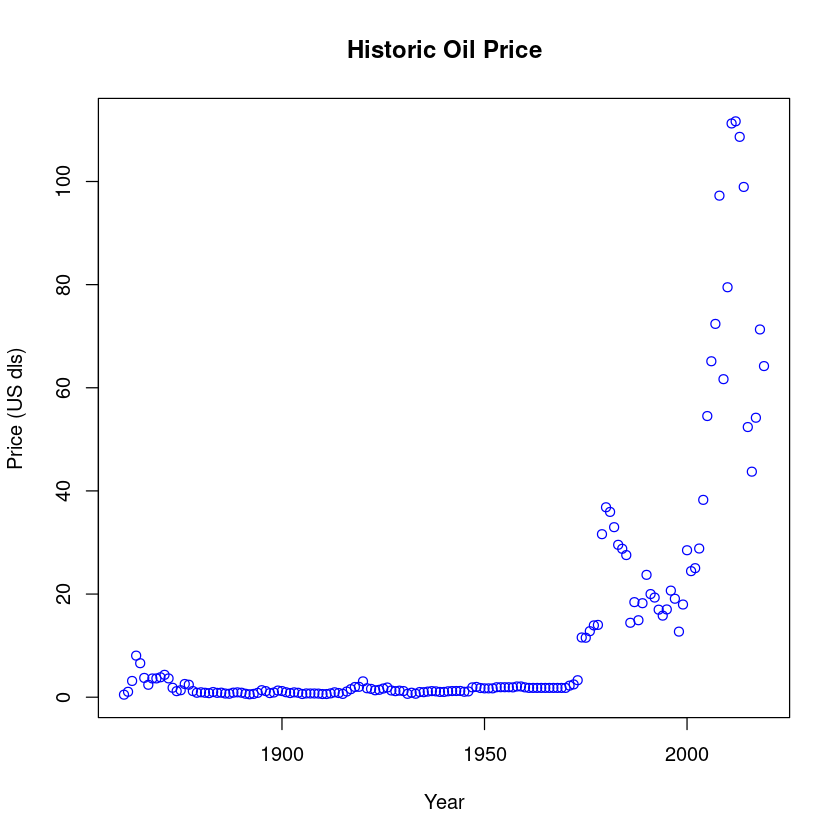

In [7]:
plot(oil[,3], oil[,4], main = 'Historic Oil Price', xlab = 'Year', ylab = 'Price (US dls)', col = 'blue')

In [8]:
library(ramify)


Attaching package: ‘ramify’


The following object is masked from ‘package:graphics’:

    clip




In [9]:
h_ins <- which.max(oil[,4])
when <- oil[h_ins,3]
h_price <- oil[h_ins,4]

In [10]:
f_derivative <- function(x){
    d <- x[2:length(x)] - x[1:length(x)-1]
    return(d)
}

In [11]:
d <- f_derivative(oil[,4])

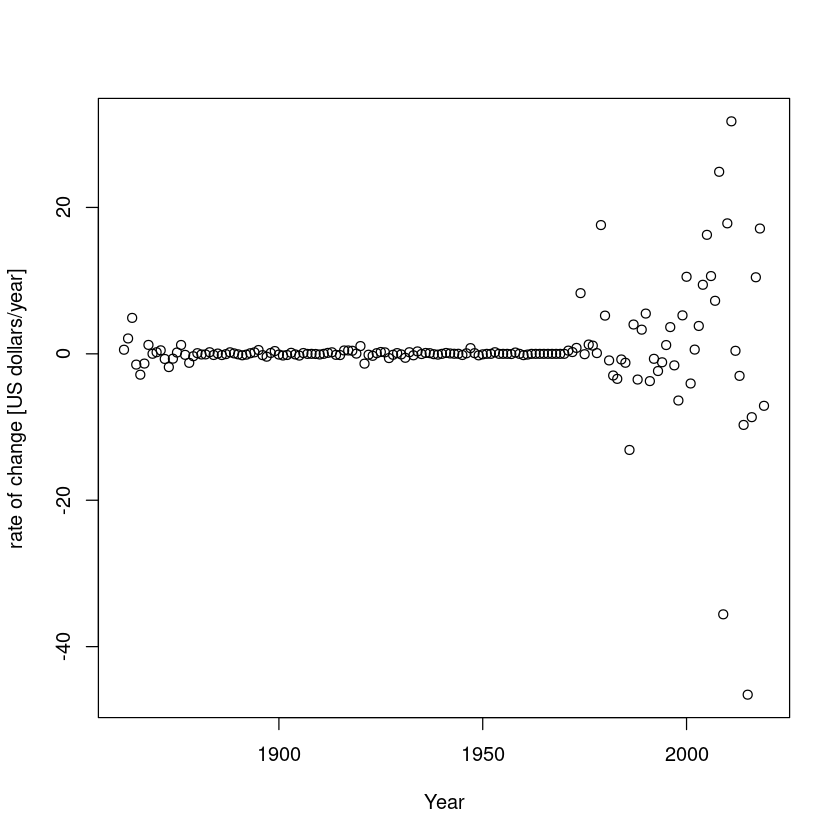

In [12]:
plot(oil[2:length(oil[,3]),3], d, xlab = 'Year', ylab = 'rate of change [US dollars/year]')


## Exercise 3 - World Coal Production

In [13]:
coal_file <- "coal-production-by-country.csv"
library(tidyverse)
coal_data <- read_csv(coal_file)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1
✔ purrr   0.3.3     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::fill()    masks ramify::fill()
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks ramify::flatten()
✖ dplyr::lag()     masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




In [14]:
coal_data

Entity,Code,Year,Coal production (TWh)
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


In [15]:
# Removing "region integrated" entries. These lack a code.
# Entries with a non-empty code column belong to specific countries.
library(stringr)
coal_data <- coal_data[!is.na(coal_data$Code) & !str_detect(coal_data$Code, 'OWID'),]
coal_data

Entity,Code,Year,Coal production (TWh)
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,AFG,1900,0
Afghanistan,AFG,1901,0
Afghanistan,AFG,1902,0
Afghanistan,AFG,1903,0
Afghanistan,AFG,1904,0
Afghanistan,AFG,1905,0
Afghanistan,AFG,1906,0
Afghanistan,AFG,1907,0
Afghanistan,AFG,1908,0


In [16]:
countries <- unlist(unique(coal_data['Entity']))
n_countries <- length(countries)
message('There are ', n_countries, ' countries in the dataset.')

obs <- as.numeric(lapply(countries, function(x){nrow(coal_data[which(coal_data['Entity'] == x),])}))

There are 171 countries in the dataset.



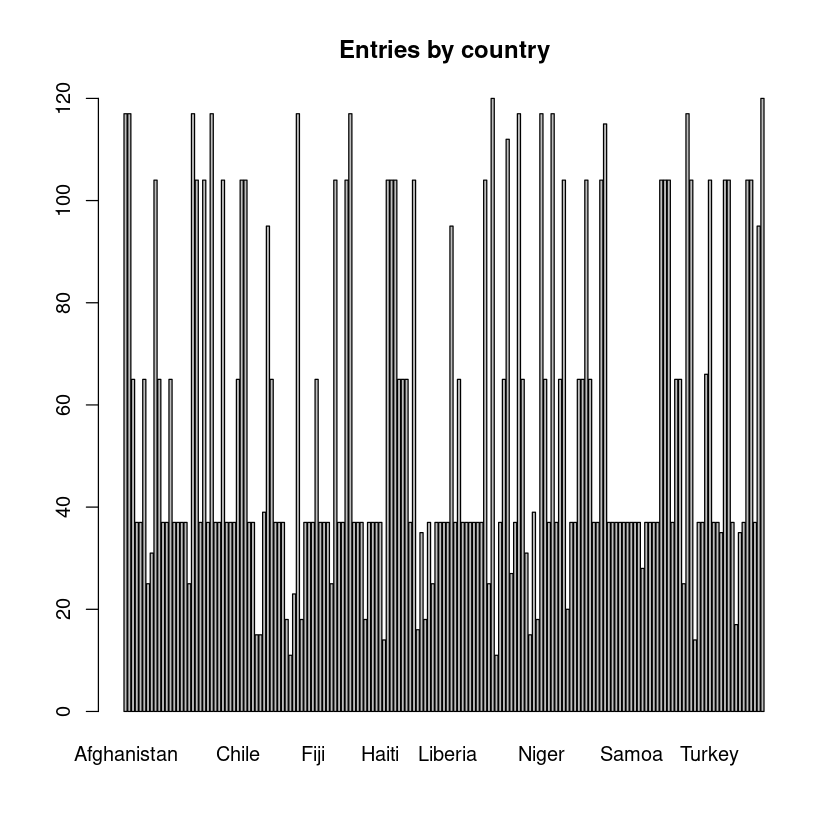

In [17]:
barplot(obs, main = 'Entries by country', names.arg = countries)

In [18]:
after_1970 <- filter(coal_data, coal_data['Year']>=1970)

In [19]:
production <- as.numeric(lapply(countries, function(x){sum(filter(coal_data, coal_data['Entity'] == x)['Coal production (TWh)'])}))
countries_production <- tibble(Country = countries, Production = production)

In [20]:
countries_production <- countries_production[order(countries_production['Production'],decreasing = TRUE),]
message('The top five countries are')
for (i in 1:5){
    country <- countries_production$Country[i]
    production <- countries_production$Production[i]
    message(i, '. ', country, ', with a ', production, 'TWh total')
}

The top five countries are

1. China, with a 480890.488TWh total

2. United States, with a 450350.188TWh total

3. Russia, with a 176007.304TWh total

4. United Kingdom, with a 115911.924TWh total

5. Germany, with a 113267.609TWh total



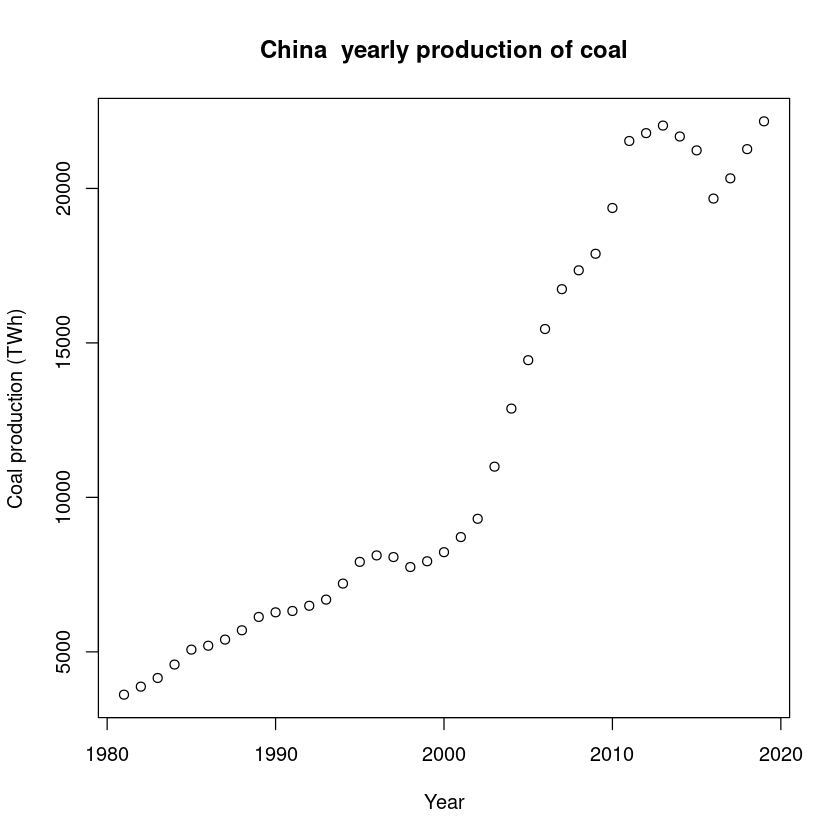

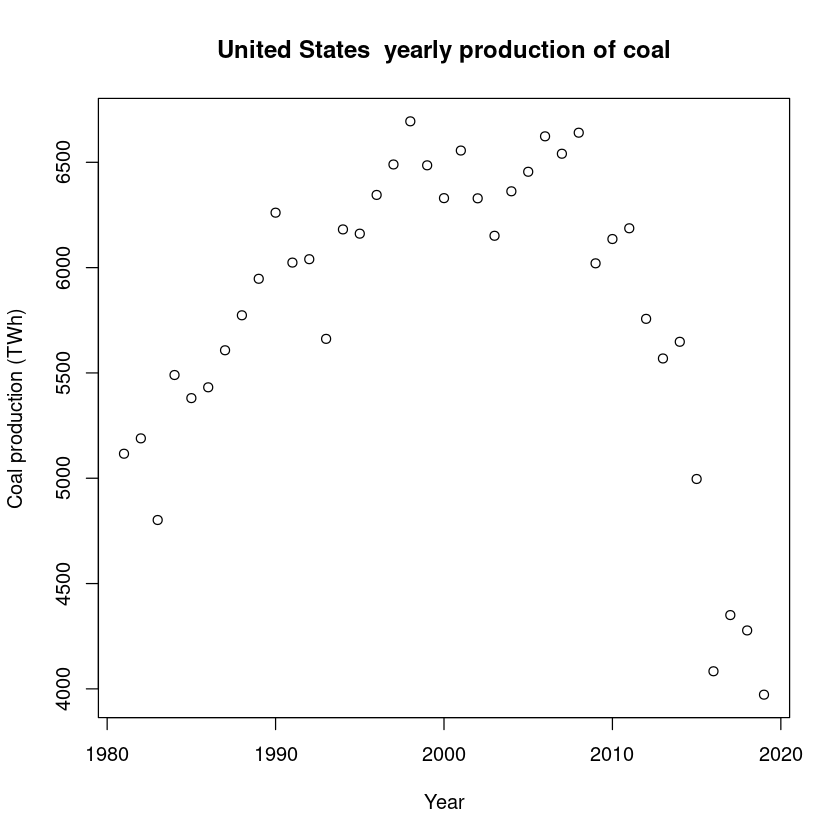

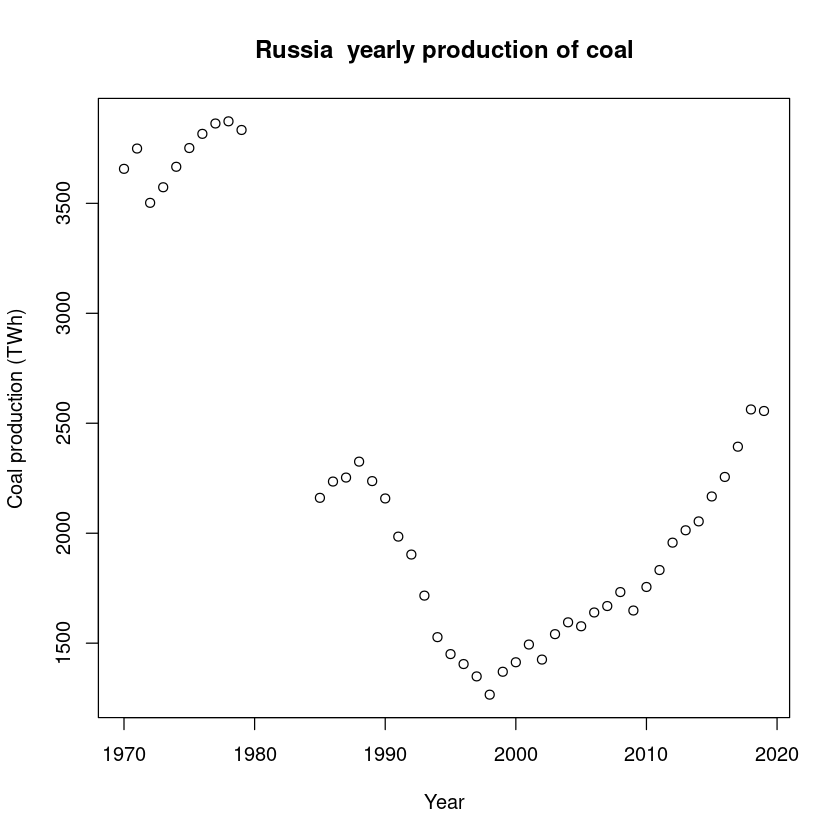

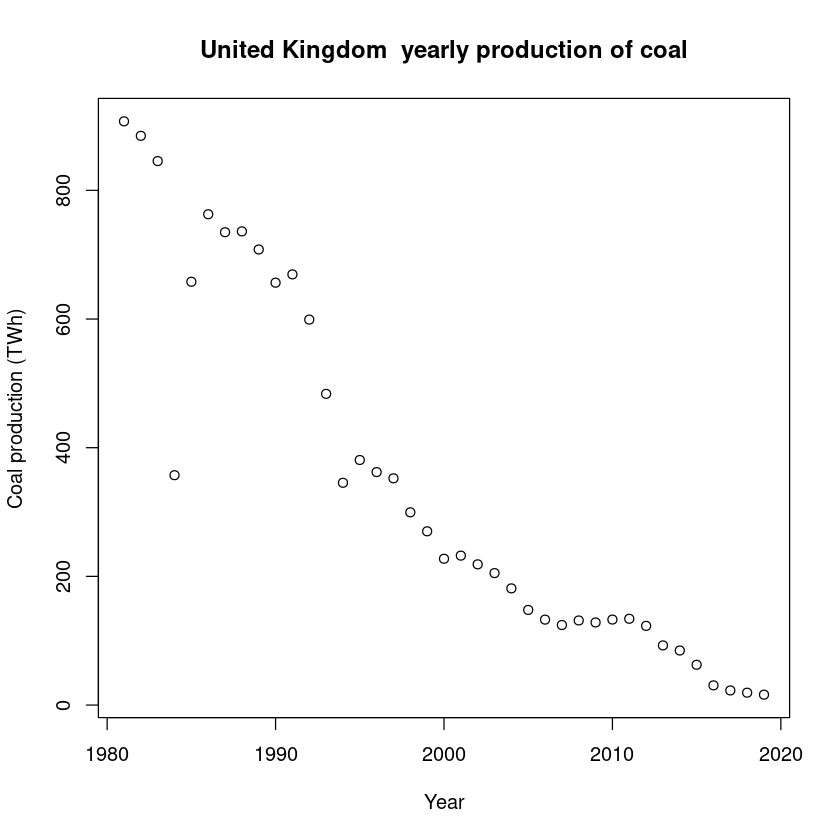

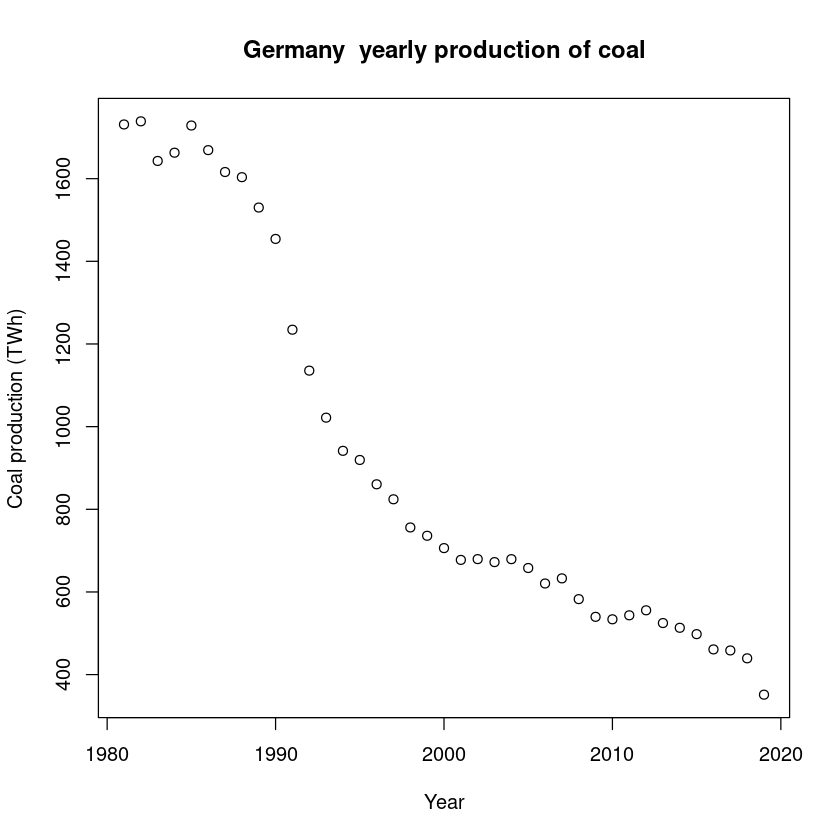

In [39]:
top_5 <- countries_production$Country[1:5]
for (country in top_5){
    country_data <- after_1970[which(after_1970$Entity == country),]
    years <- country_data$Year
    production <- t(country_data['Coal production (TWh)'])
    plot(years,production, main = paste(country, ' yearly production of coal'), xlab = 'Year', ylab = 'Coal production (TWh)')
}

In [38]:
# TODO: Sum of global production per year

ERROR: Error in parse(text = x, srcfile = src): <text>:1:25: unexpected '$'
1: after_1970 %>% group_by($
                            ^
